### Imports

In [1]:
from src.methods import (SafeLevelSmote,BorderlineSMOTE,OneSidedSelection)
from src.c45 import C45
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import  numpy as np

### Calculate performance metrics based on C4.5 classification

In [2]:
def score_data(x: np.array, y: np.array, cv=5) -> pd.DataFrame:
	clf = C45()
	y_pred = cross_val_predict(clf, x, y, cv=cv)
	return pd.DataFrame(classification_report(y,y_pred,output_dict=True))

In [3]:
def visualize_points(X, y) -> None:
    c =['tab:orange' if i ==1 else "tab:blue" for i in y]
    plt.scatter(X[:, 0], X[:, 1], c=c)
    plt.show()

### Datasets

#### Dummy dataset

Counter({0: 990, 1: 10})


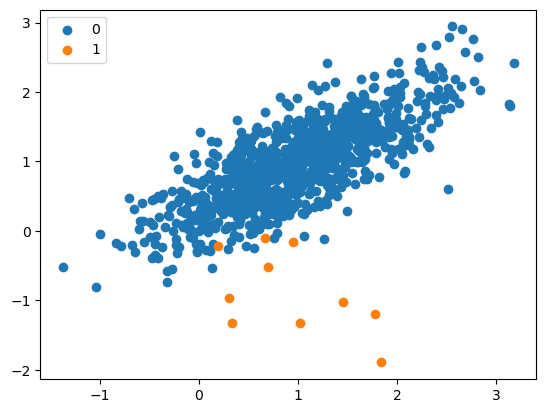

In [4]:
dummy_X, dummy_y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(dummy_y)
print(counter)
for label, _ in counter.items():
	row_ix = np.where(dummy_y == label)[0]
	plt.scatter(dummy_X[row_ix, 0], dummy_X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

##### Base performance

In [5]:
base_scores_dummy = score_data(dummy_X, dummy_y)
display(base_scores_dummy)

,0,1,accuracy,macro avg,weighted avg
precision,0.995964,0.666667,0.993,0.831315,0.992671
recall,0.996970,0.600000,0.993,0.798485,0.993000
f1-score,0.996466,0.631579,0.993,0.814023,0.992818
support,990.000000,10.000000,0.993,1000.000000,1000.000000


#### Satimage

In [6]:
satimage_df = pd.read_csv('datasets/satimage.csv')
satimage = satimage_df.to_numpy()
satimage_X,satimage_y =satimage[:,:-1],satimage[:,-1]
satimage_y = np.where(satimage_y==4.0,1.0,0.0)

##### Base performance

In [7]:
base_scores_satimage = score_data(satimage_X, satimage_y)
display(base_scores_satimage)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.952067,0.519345,0.906843,0.735706,0.910006
recall,0.944358,0.558400,0.906843,0.751379,0.906843
f1-score,0.948197,0.538165,0.906843,0.743181,0.908341
support,5805.000000,625.000000,0.906843,6430.000000,6430.000000


### Compare performance of methods

In [8]:
def report(strategy, X, y, base_scores,visualize=False):
	X_resampled,y_resampled = strategy.fit_resample(X, y)
	resampled_scores_dummy = score_data(X_resampled,y_resampled)
	difference = (resampled_scores_dummy-base_scores).round(3)
	display(difference)
	if visualize:
		visualize_points(X_resampled,y_resampled)

#### BorderlineSMOTE

##### Dummy dataset

,0,1,accuracy,macro avg,weighted avg
precision,-0.003,0.083,-0.005,0.04,-0.005
recall,-0.002,0.082,-0.005,0.04,-0.005
f1-score,-0.003,0.083,-0.005,0.04,-0.005
support,0.000,12.000,-0.005,12.00,12.000


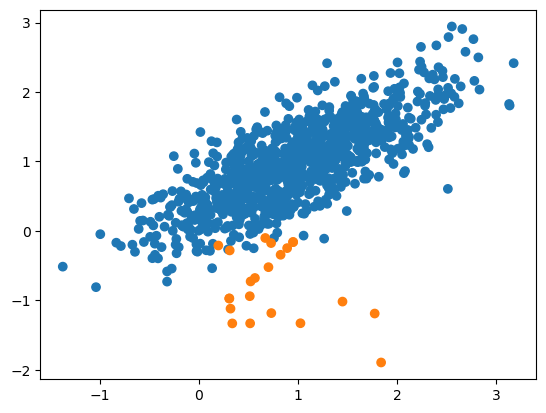

In [9]:
report(BorderlineSMOTE(), dummy_X, dummy_y, base_scores_dummy, True)

##### Satimage

In [10]:
report(BorderlineSMOTE(), satimage_X, satimage_y,base_scores_satimage)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.005,0.243,0.012,0.124,0.012
recall,-0.001,0.254,0.012,0.126,0.012
f1-score,0.002,0.248,0.012,0.125,0.012
support,0.000,675.000,0.012,675.000,675.000


#### OneSidedSelection

##### Dummy dataset

,0,1,accuracy,macro avg,weighted avg
precision,-0.010,-0.051,-0.037,-0.031,-0.030
recall,-0.031,0.200,-0.037,0.085,-0.037
f1-score,-0.020,0.064,-0.037,0.022,-0.034
support,-842.000,0.000,-0.037,-842.000,-842.000


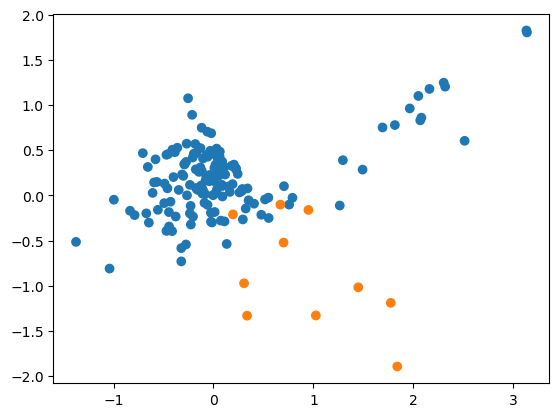

In [11]:
report(OneSidedSelection(), dummy_X, dummy_y, base_scores_dummy, True)

##### Satimage

In [12]:
report(OneSidedSelection(), satimage_X, satimage_y, base_scores_satimage)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,-0.005,0.010,-0.009,0.003,-0.008
recall,-0.006,0.014,-0.009,0.004,-0.009
f1-score,-0.006,0.012,-0.009,0.003,-0.008
support,-676.000,0.000,-0.009,-676.000,-676.000


#### SafeLevelSmote

##### Dummy dataset

,0,1,accuracy,macro avg,weighted avg
precision,0.004,0.103,0.001,0.053,0.003
recall,-0.003,0.400,0.001,0.198,0.001
f1-score,0.000,0.238,0.001,0.119,0.002
support,0.000,10.000,0.001,10.000,10.000


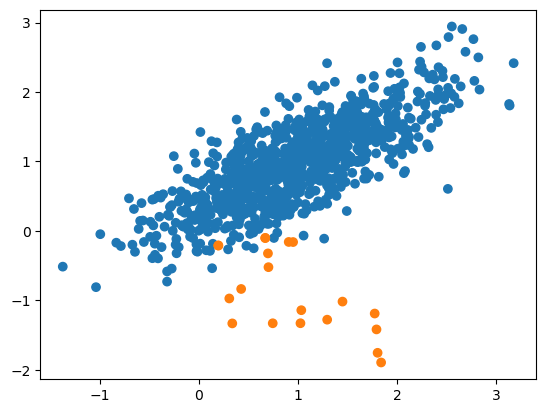

In [13]:
report(SafeLevelSmote(), dummy_X, dummy_y, base_scores_dummy, True)

##### Satimage

In [14]:
report(SafeLevelSmote(), satimage_X, satimage_y, base_scores_satimage)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.010,0.229,0.013,0.120,0.014
recall,-0.004,0.271,0.013,0.133,0.013
f1-score,0.003,0.249,0.013,0.126,0.014
support,0.000,625.000,0.013,625.000,625.000
